### insight into dunnhumby Carbo-Loading dataset

In [3]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
causal = pd.read_csv('dh_causal_lookup.csv')
transactions = pd.read_csv('dh_transactions.csv')
products = pd.read_csv('dh_product_lookup.csv')
stores = pd.read_csv('dh_store_lookup.csv')
# Empty file. No data included
#causal1 = pd.read_csv('dh_causal_lookup_1.csv')

In [438]:
# descriptive statistics summary
transactions.describe()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
count,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06
mean,6.205031e+09,1.759975e+00,1.196697e+00,1.543646e+03,1.459434e+00,5.323352e+01,2.231164e+05,2.020686e+02,1.663209e+06,3.696076e+02,1.609203e-02
std,3.152957e+09,1.127167e+00,5.683504e-01,3.850368e+02,4.983518e-01,3.004763e+01,1.412376e+05,1.120017e+02,9.593364e+05,2.103655e+02,1.258296e-01
min,1.111124e+08,1.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.620000e+09,9.900000e-01,1.000000e+00,1.258000e+03,1.000000e+00,2.700000e+01,9.899100e+04,1.060000e+02,8.304460e+05,1.850000e+02,0.000000e+00
50%,5.100013e+09,1.500000e+00,1.000000e+00,1.602000e+03,1.000000e+00,5.500000e+01,2.096455e+05,2.090000e+02,1.666866e+06,3.800000e+02,0.000000e+00
75%,9.999982e+09,2.190000e+00,1.000000e+00,1.825000e+03,2.000000e+00,7.900000e+01,3.395882e+05,3.000000e+02,2.496803e+06,5.510000e+02,0.000000e+00
max,9.999986e+09,1.531400e+02,1.560000e+02,2.359000e+03,2.000000e+00,1.040000e+02,5.100270e+05,3.870000e+02,3.316349e+06,7.280000e+02,1.000000e+00


- There are negative in dollar_sales which might be return products

In [7]:
# total return amount
transactions[transactions.dollar_sales<0]['dollar_sales'].sum()

-839.19

In [8]:
#total sales 
transactions['dollar_sales'].sum()

9130079.889999995

- total sales +9.1 M and return $831 which can be ignore hence no need to count of return items

In [9]:
transactions=transactions[transactions.dollar_sales>0]

In [178]:
#transactions[transactions.upc==3340060109][transactions[transactions.upc==3340060109]['household']==443392]

In [10]:
causal.head()

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1


In [11]:
# !pip install sas7bdat
# sas7bdat was checked and the data in csv and sas7bdat are same so we will use csv data only
#with SAS7BDAT('dh_causal_lookup.sas7bdat', skip_header=True) as reader:
    #for row in reader:
        #print (row)

- similar ata in the sas7bdat so we will use csv data only

In [12]:
causal.columns

Index(['upc', 'store', 'week', 'feature_desc', 'display_desc', 'geography'], dtype='object')

In [13]:
transactions.columns

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon'],
      dtype='object')

In [14]:
products.columns

Index(['upc', 'product_description', 'commodity', 'brand', 'product_size'], dtype='object')

In [15]:
stores.columns

Index(['store', 'store_zip_code'], dtype='object')

### Checking nulls

In [16]:
transactions.isnull().sum()

upc                    0
dollar_sales           0
units                  0
time_of_transaction    0
geography              0
week                   0
household              0
store                  0
basket                 0
day                    0
coupon                 0
dtype: int64

In [17]:
causal.isnull().sum()

upc             0
store           0
week            0
feature_desc    0
display_desc    0
geography       0
dtype: int64

In [18]:
stores.isnull().sum()

store             0
store_zip_code    0
dtype: int64

In [19]:
products.isnull().sum()

upc                    0
product_description    0
commodity              0
brand                  0
product_size           0
dtype: int64

- Very clean data. Just need to join tables to end up with what is asked in the question.

In [21]:
transactions.head(10)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
5,5100002794,2.19,1,1323,2,1,89437,244,4,1,0
6,1800000957,3.45,1,1415,2,1,158549,244,5,1,0
7,9999985051,1.29,1,1415,2,1,158549,244,5,1,0
8,9999985053,0.75,1,1513,2,1,18851,244,6,1,0
9,3620000446,2.19,1,1523,2,1,118337,244,7,1,0


In [22]:
products.head()

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


In [23]:
trans_prod = transactions.merge(products, 'left', 'upc')

In [24]:
## Checking if there is any product that is sold but does not exist in products. That is why left join is performed.

trans_prod[['product_description','commodity', 'brand', 'product_size']].isnull().sum()

product_description    0
commodity              0
brand                  0
product_size           0
dtype: int64

- That means product table covers all products.

###  a. What are the top 5 products in each commodity?


- top 5 products in each commodity can be calculated by looking at dolar sales or units 
- Firstly the top 5 products will be identified in each commodity regarding the sales 
- Secondly, the top 5 products will be identified in each commodity regarding the units

In [25]:
# Top 5 regarding sales
sales = trans_prod.groupby(by = ['commodity', 'upc','product_description'])['dollar_sales'].sum().reset_index()

In [439]:
# Top 5 regarding sales

# Pancake Mixes Top 5
T_5_Pancake_Mixes=sales[sales['commodity'] == 'pancake mixes'][['upc','product_description','dollar_sales']]. \
                                    sort_values('dollar_sales', ascending = False).head(5)
T_5_Pancake_Mixes

,upc,product_description,dollar_sales
21,3000005300,AJ BUTTERMILK PANCAKE MIX,93322.41
19,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,55981.36
20,3000005070,A/JEM COMPLETE PANCAKE MI,50032.39
45,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,44963.78
12,1800028064,H J PANCK BTRMLK COMP MIX,44006.21


In [443]:
## for the presantation
T_5_Pancake_Mixes.to_csv('Pancake_Mixes.csv', index=False)
sales[sales['commodity'] == 'pancake mixes']['dollar_sales'].sum()-T_5_Pancake_Mixes['dollar_sales'].sum()

223533.68999999942

In [444]:
# Syrup Top 5
T_5_Syrup=sales[sales['commodity'] == 'syrups'][['upc','product_description','dollar_sales']].\
sort_values('dollar_sales', ascending = False).head(5)
T_5_Syrup

,upc,product_description,dollar_sales
814,3000005970,AUNT JEMIMA ORIGINL SYRUP,98922.68
916,9999967727,PRIVATE LABEL SYRUP PLASTIC BOTTLE,96155.55
853,4420979129,MRS BUTTERWORTH SYRUP,86813.88
924,9999981816,PRIVATE LABEL MAPLE SYRUP,66622.12
911,9999966070,PRIVATE LABEL BUTTERED SYRUP,62948.00


In [450]:
## for the presantation
T_5_Syrup.to_csv('T_5_Syrup.csv', index=False)
sales[sales['commodity'] == 'syrups']['dollar_sales'].sum()-T_5_Syrup['dollar_sales'].sum()

1329874.6600000048

In [451]:
# Pasta Sauce Top 5
T_5_Pasta_Sauce=sales[sales['commodity'] == 'pasta sauce'][['upc','product_description','dollar_sales']]. \
                                    sort_values('dollar_sales', ascending = False).head(5)
T_5_Pasta_Sauce

,upc,product_description,dollar_sales
545,3620000250,RAGU TRADITIONAL PLAIN,146484.22
658,5100002549,PREGO REG SPAGHETTI SAUCE,115526.82
546,3620000300,RAGU OWS SPAG SAUCE MEAT,89176.76
585,3620001401,RAGU SPAGH SAUCE PLAIN,80414.19
578,3620001369,RAGU\CHZ CREATION ALFRDO,79493.99


In [452]:
## for the presantation
T_5_Pasta_Sauce.to_csv('T_5_Pasta_Sauce.csv', index=False)
sales[sales['commodity'] == 'pasta sauce']['dollar_sales'].sum()-T_5_Pasta_Sauce['dollar_sales'].sum()

3514102.6600000868

In [453]:
# Pasta Top 5
T_5_Pasta=sales[sales['commodity'] == 'pasta'][['upc','product_description','dollar_sales']]. \
                                    sort_values('dollar_sales', ascending = False).head(5)
T_5_Pasta

,upc,product_description,dollar_sales
442,9999985020,PRIVATE LABEL THIN SPAGHETTI,84655.39
439,9999985004,PRIVATE LABEL SPAGHETTI REGULAR,80428.44
473,9999985068,PRIVATE LABEL ANGEL HAIR PASTA,66166.23
461,9999985051,PRIVATE LABEL SPAGHETTI THIN,61582.11
440,9999985005,PRIVATE LABEL SPAGHETTI REGULAR,60581.86


In [454]:
## for the presantation
T_5_Pasta.to_csv('T_5_Pasta.csv', index=False)
sales[sales['commodity'] == 'pasta']['dollar_sales'].sum()-T_5_Pasta['dollar_sales'].sum()

2499129.6800000397

In [30]:
#Top 5 regarding units
units = trans_prod.groupby(by = ['commodity', 'upc','product_description'])['units'].sum().reset_index()

In [460]:
# Top 5 regarding units
## Pancake Mixes Top 5
T_5_Pancake_Mixes_U=units[units['commodity'] == 'pancake mixes'][['upc','product_description','units']]. \
                                    sort_values('units', ascending = False).head(5)
T_5_Pancake_Mixes_U

,upc,product_description,units
21,3000005300,AJ BUTTERMILK PANCAKE MIX,45591
45,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,35488
19,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,26756
20,3000005070,A/JEM COMPLETE PANCAKE MI,23961
44,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,22898


In [467]:
## for the presantation
T_5_Pancake_Mixes_U.to_csv('T_5_Pancake_Mixes_U.csv', index=False)
units[units['commodity'] == 'pancake mixes']['units'].sum()-T_5_Pancake_Mixes_U['units'].sum()

145758

In [455]:
## Syrup Top 5
T_5_Syrup_U=units[units['commodity'] == 'syrups'][['upc','product_description','units']]. \
                                    sort_values('units', ascending = False).head(5)
T_5_Syrup_U

,upc,product_description,units
916,9999967727,PRIVATE LABEL SYRUP PLASTIC BOTTLE,64530
911,9999966070,PRIVATE LABEL BUTTERED SYRUP,42579
814,3000005970,AUNT JEMIMA ORIGINL SYRUP,32385
853,4420979129,MRS BUTTERWORTH SYRUP,29451
917,9999967728,PRIVATE LABEL LITE PANCAKE SYRUP,27112


In [457]:
## for the presantation
T_5_Syrup_U.to_csv('T_5_Syrup_U.csv', index=False)
units[units['commodity'] == 'syrups']['units'].sum()-T_5_Syrup_U['units'].sum()

528640

In [458]:
## Pasta Sauce Top 5
T_5_Pasta_Sauce_U=units[units['commodity'] == 'pasta sauce'][['upc','product_description','units']]. \
                                    sort_values('units', ascending = False).head(5)
T_5_Pasta_Sauce_U

,upc,product_description,units
545,3620000250,RAGU TRADITIONAL PLAIN,100432
658,5100002549,PREGO REG SPAGHETTI SAUCE,66631
546,3620000300,RAGU OWS SPAG SAUCE MEAT,62682
535,2700042238,HUNT TRADITIONAL SAUCE,62003
578,3620001369,RAGU\CHZ CREATION ALFRDO,48466


In [459]:
## for the presantation
T_5_Pasta_Sauce_U.to_csv('T_5_Pasta_Sauce_U.csv', index=False)
units[units['commodity'] == 'pasta sauce']['units'].sum()-T_5_Pasta_Sauce_U['units'].sum()

1970154

In [468]:
## Pasta Top 5
T_5_Pasta_U=units[units['commodity'] == 'pasta'][['upc','product_description','units']]. \
                                    sort_values('units', ascending = False).head(5)
T_5_Pasta_U

,upc,product_description,units
442,9999985020,PRIVATE LABEL THIN SPAGHETTI,146443
439,9999985004,PRIVATE LABEL SPAGHETTI REGULAR,139999
473,9999985068,PRIVATE LABEL ANGEL HAIR PASTA,111723
443,9999985021,PRIVATE LABEL ELBO MACARONI,78246
436,9999985001,PRIVATE LABEL THIN SPAGHETTI,60402


In [469]:
## for the presantation
T_5_Pasta_U.to_csv('T_5_Pasta_U.csv', index=False)
units[units['commodity'] == 'pasta']['units'].sum()-T_5_Pasta_U['units'].sum()

2336247

### b.	What are the top 5 brands in each commodity?

In [471]:
trans_prod.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,unit_price
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,0.80
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,3.59
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,,2.25
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,0.85
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,2.19


In [478]:
# Checking sales for each brand 
# We do not need UPC code
sales_brand = trans_prod.groupby(by = ['commodity','brand'])['dollar_sales'].sum().reset_index()

In [479]:
sales_brand.head()

,commodity,brand,dollar_sales
0,pancake mixes,Aunt Jemima,206708.70
1,pancake mixes,Bisquick,18439.35
2,pancake mixes,Bruce's,3930.90
3,pancake mixes,Classique,2675.07
4,pancake mixes,Fastshake,39.61


In [484]:
# Top 5 regarding sales

# Pancake Mixes Top 5
T_5_Pancake_Mixes_B=sales_brand[sales_brand['commodity'] == 'pancake mixes'][['brand','dollar_sales']]. \
                                    sort_values('dollar_sales', ascending = False).head(5)
T_5_Pancake_Mixes_B

,brand,dollar_sales
0,Aunt Jemima,206708.70
6,Hungry Jack,111437.62
14,Private Label,73620.39
7,Krusteaz,30528.77
1,Bisquick,18439.35


In [486]:
## for the presantation
T_5_Pancake_Mixes_B.to_csv('T_5_Pancake_Mixes_B.csv', index=False)
sales_brand[sales_brand['commodity'] == 'pancake mixes']['dollar_sales'].sum()-T_5_Pancake_Mixes_B['dollar_sales'].sum()

71105.01000000152

In [487]:
## Syrup Top 5
T_5_Syrup_B=sales_brand[sales_brand['commodity'] == 'syrups'][['brand','dollar_sales']]. \
                                    sort_values('dollar_sales', ascending = False).head(5)
T_5_Syrup_B

,brand,dollar_sales
117,Aunt Jemima,359669.04
142,Private Label,352952.87
138,Mrs Butterworth,159165.47
132,Log Cabin,130905.87
129,Karo,120430.98


In [488]:
## for the presantation
T_5_Syrup_B.to_csv('T_5_Syrup_B.csv', index=False)
sales_brand[sales_brand['commodity'] == 'syrups']['dollar_sales'].sum()-T_5_Syrup_B['dollar_sales'].sum()

618212.6599999857

In [489]:
## Pasta Sauce Top 5
T_5_Pasta_Sauce_B=sales_brand[sales_brand['commodity'] == 'pasta sauce'][[ 'brand','dollar_sales']]. \
                                    sort_values('dollar_sales', ascending = False).head(5)
T_5_Pasta_Sauce_B

,brand,dollar_sales
108,Ragu,1.500841e+06
103,Prego,7.999493e+05
86,Classico,4.381867e+05
104,Private Label,3.310957e+05
79,Bertolli,2.581021e+05


In [490]:
## for the presantation
T_5_Pasta_Sauce_B.to_csv('T_5_Pasta_Sauce_B.csv', index=False)
sales_brand[sales_brand['commodity'] == 'pasta sauce']['dollar_sales'].sum()-T_5_Pasta_Sauce_B['dollar_sales'].sum()

697023.9000004516

In [491]:
## Pasta Top 5
T_5_Pasta_B=sales_brand[sales_brand['commodity'] == 'pasta'][['brand','dollar_sales']]. \
                                    sort_values('dollar_sales', ascending = False).head(5)
T_5_Pasta_B

,brand,dollar_sales
62,Private Label,995287.840001
22,Barilla,433893.839999
30,Creamette,271594.860000
55,Mueller,270850.500000
68,Ronzoni,213727.200000


In [492]:
## for the presantation
T_5_Pasta_B.to_csv('T_5_Pasta_B.csv', index=False)
sales_brand[sales_brand['commodity'] == 'pasta']['dollar_sales'].sum()-T_5_Pasta_B['dollar_sales'].sum()

667189.4700000593

In [42]:
# Checking units for each brand 
units_brand = trans_prod.groupby(by = ['commodity','brand'])['units'].sum().reset_index()

In [482]:
units_brand.head()

,commodity,brand,units
0,pancake mixes,Aunt Jemima,101843
1,pancake mixes,Bisquick,17651
2,pancake mixes,Bruce's,1121
3,pancake mixes,Classique,853
4,pancake mixes,Fastshake,39


In [493]:
## Top 5 regarding sales

## Pancake Mixes Top 5
T_5_Pancake_Mixes_B_U=units_brand[units_brand['commodity'] == 'pancake mixes'][['brand','units']]. \
                                    sort_values('units', ascending = False).head(5)
T_5_Pancake_Mixes_B_U

,brand,units
0,Aunt Jemima,101843
14,Private Label,58386
6,Hungry Jack,57012
16,White Lily,22082
1,Bisquick,17651


In [496]:
## for the presantation
T_5_Pancake_Mixes_B_U.to_csv('T_5_Pancake_Mixes_B_U.csv', index=False)
units_brand[units_brand['commodity'] == 'pancake mixes']['units'].sum()-T_5_Pancake_Mixes_B_U['units'].sum()

43478

In [497]:
## Syrup Top 5
T_5_Syrup_B_U=units_brand[units_brand['commodity'] == 'syrups'][['brand','units']]. \
                                    sort_values('units', ascending = False).head(5)
T_5_Syrup_B_U

,brand,units
142,Private Label,222469
117,Aunt Jemima,123936
138,Mrs Butterworth,52596
129,Karo,52003
139,Northwoods,51672


In [498]:
## for the presantation
T_5_Syrup_B_U.to_csv('T_5_Syrup_B_U.csv', index=False)
units_brand[units_brand['commodity'] == 'syrups']['units'].sum()-T_5_Syrup_B_U['units'].sum()

222021

In [499]:
## Pasta Sauce Top 5
T_5_Pasta_Sauce_B_U=units_brand[units_brand['commodity'] == 'pasta sauce'][['brand','units']]. \
                                    sort_values('units', ascending = False).head(5)
T_5_Pasta_Sauce_B_U

,brand,units
108,Ragu,889164
103,Prego,402780
104,Private Label,305841
94,Hunt's,253424
86,Classico,172232


In [500]:
## for the presantation
T_5_Pasta_Sauce_B_U.to_csv('T_5_Pasta_Sauce_B_U.csv', index=False)
units_brand[units_brand['commodity'] == 'pasta sauce']['units'].sum()-T_5_Pasta_Sauce_B_U['units'].sum()

286927

In [501]:
## Pasta Top 5
T_5_Pasta_B_U=units_brand[units_brand['commodity'] == 'pasta'][['brand','units']]. \
                                    sort_values('units', ascending = False).head(5)
T_5_Pasta_B_U

,brand,units
62,Private Label,1268797
22,Barilla,392225
30,Creamette,254375
55,Mueller,247890
63,Private Label Premium,208542


In [502]:
## for the presantation
T_5_Pasta_B_U.to_csv('T_5_Pasta_B_U.csv', index=False)
units_brand[units_brand['commodity'] == 'pasta']['units'].sum()-T_5_Pasta_B_U['units'].sum()

501231

### c.	What drives my sales? Which brands and which customers

In [262]:
# Top 10 brands
unit_brand=pd.DataFrame(trans_prod.groupby(['brand'])['units'].sum()).sort_values(['units'], ascending=False).reset_index()
unit_brand.head(10)

,brand,units
0,Private Label,1855493
1,Ragu,889164
2,Barilla,470708
3,Prego,402780
4,Private Label Premium,271897
5,Creamette,254375
6,Hunt's,253424
7,Mueller,247890
8,Aunt Jemima,225779
9,Ronzoni,187470


In [263]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 

<Figure size 1080x576 with 0 Axes>

<BarContainer object of 10 artists>

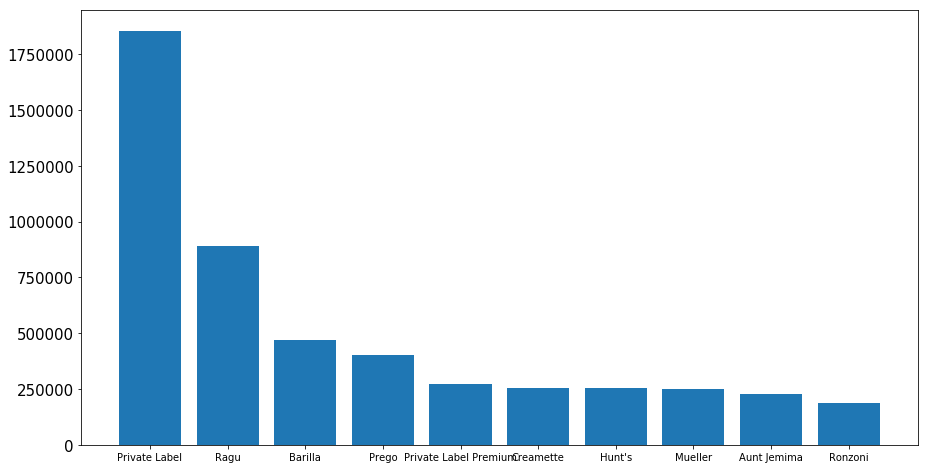

In [264]:
# top 10 brands 
top_10_brand=unit_brand.head(10)
plt.figure(figsize=(15,8))
plt.bar(top_10_brand.brand, top_10_brand.units)

In [265]:
# For each commodity brend vs unit bar plot (top 10)
pasta=trans_prod[trans_prod.commodity=='pasta']
pasta_sauce=trans_prod[trans_prod.commodity=='pasta sauce']
pancake_mixes=trans_prod[trans_prod.commodity=='pancake mixes']
syrups=trans_prod[trans_prod.commodity=='syrups']

<BarContainer object of 10 artists>

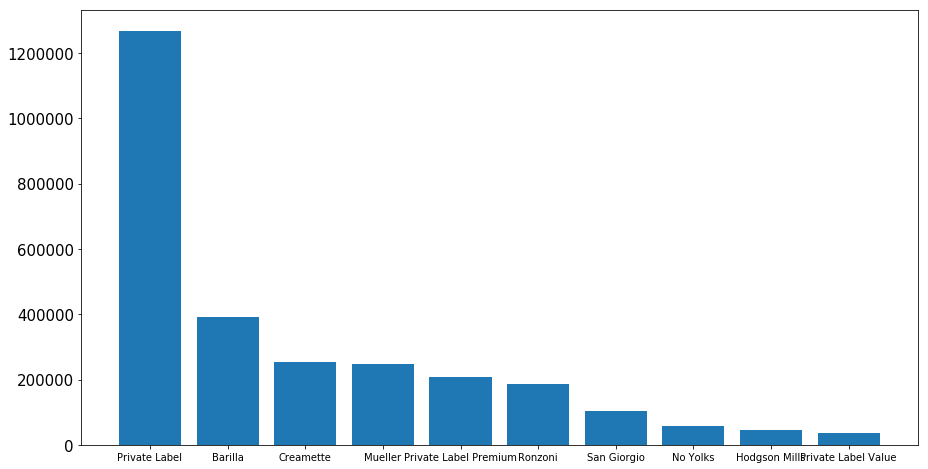

In [266]:
# top 10 brands for pasta
pasta_unit_brand=pd.DataFrame(pasta.groupby(['brand'])['units'].sum()).sort_values(['units'], ascending=False).reset_index()
# top 10 brands for pasta
top_10_pasta_unit_brand=pasta_unit_brand.head(10)
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 
plt.bar(top_10_pasta_unit_brand.brand, top_10_pasta_unit_brand.units)

<BarContainer object of 10 artists>

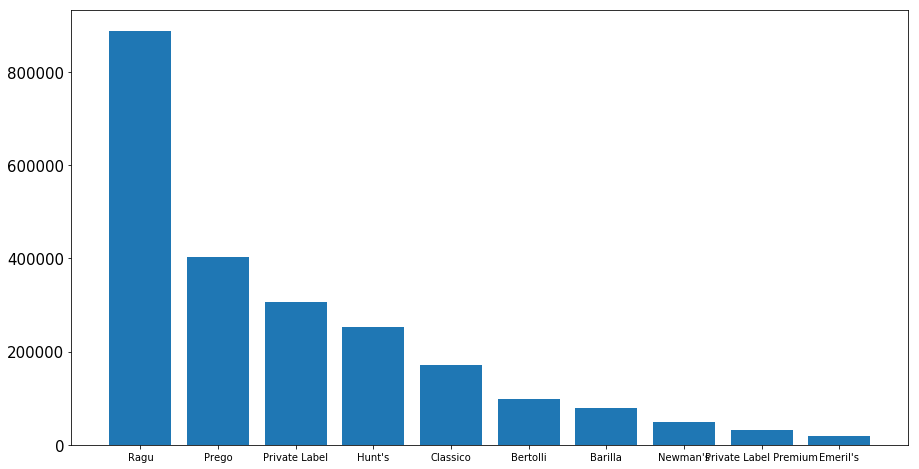

In [267]:
# top 10 brands for pasta_sauce
pasta_sauce_brand=pd.DataFrame(pasta_sauce.groupby(['brand'])['units'].sum()).sort_values(['units'], ascending=False).reset_index()
# top 10 brands for pasta
top_10_pasta_sauce=pasta_sauce_brand.head(10)
plt.figure(figsize=(15,8))
plt.bar(top_10_pasta_sauce.brand, top_10_pasta_sauce.units)

<BarContainer object of 10 artists>

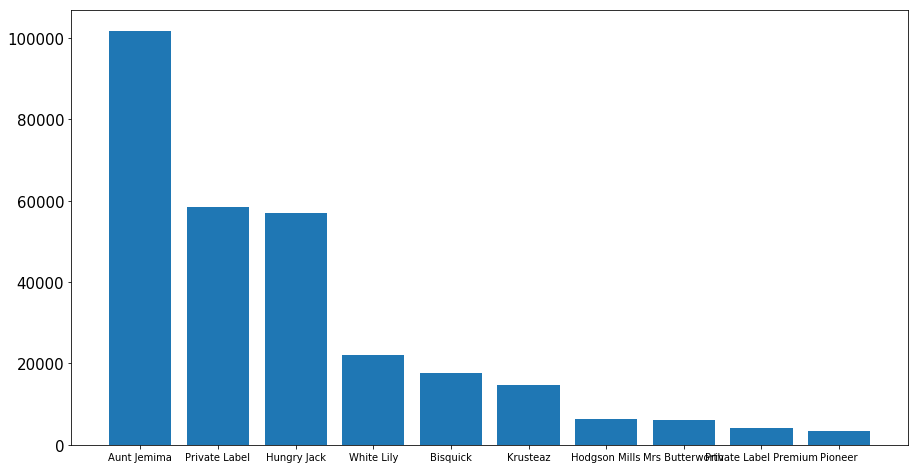

In [268]:
pancake_mixes_brand=pd.DataFrame(pancake_mixes.groupby(['brand'])['units'].sum()).sort_values(['units'], ascending=False).reset_index()
# top 10 brands for pasta
top_10_pancake_mixes=pancake_mixes_brand.head(10)
plt.figure(figsize=(15,8))
plt.bar(top_10_pancake_mixes.brand, top_10_pancake_mixes.units)

<BarContainer object of 10 artists>

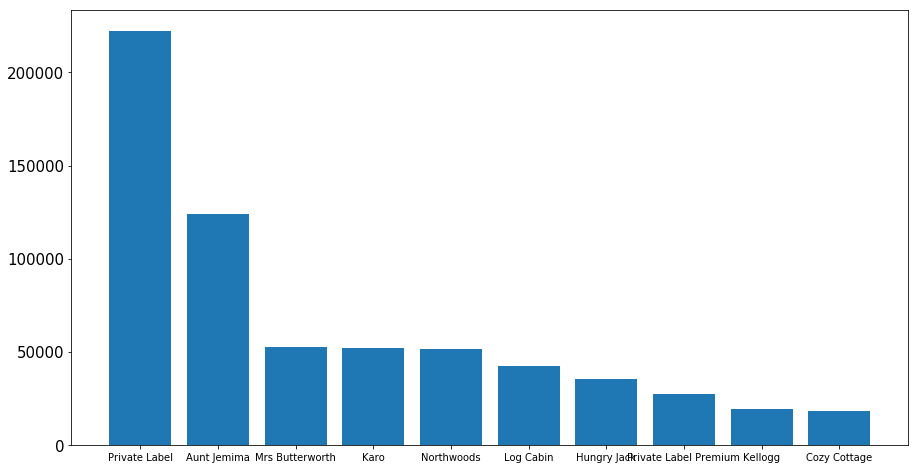

In [269]:
syrups_brand=pd.DataFrame(syrups.groupby(['brand'])['units'].sum()).sort_values(['units'], ascending=False).reset_index()
# top 10 brands for pasta
top_10_syrups=syrups_brand.head(10)
plt.figure(figsize=(15,8))
plt.bar(top_10_syrups.brand, top_10_syrups.units)

### top 10 brands regarding sales

In [505]:
# top 10 brands regarding sales in all df and each commidity are combined in on table
unit_brand=pd.DataFrame(trans_prod.groupby(['brand'])['dollar_sales'].sum()).sort_values(['dollar_sales'], ascending=False).reset_index()
top_10_brand=unit_brand.head(10)
# top 10 brands for pasta
pasta_unit_brand=pd.DataFrame(pasta.groupby(['brand'])['dollar_sales'].sum()).sort_values(['dollar_sales'], ascending=False).reset_index()
# top 10 brands for pasta
top_10_pasta_unit_brand=pasta_unit_brand.head(10)
# top 10 brands for pasta_sauce
pasta_sauce_brand=pd.DataFrame(pasta_sauce.groupby(['brand'])['dollar_sales'].sum()).sort_values(['dollar_sales'], ascending=False).reset_index()
# top 10 brands for pasta_sauce
top_10_pasta_sauce=pasta_sauce_brand.head(10)
pancake_mixes_brand=pd.DataFrame(pancake_mixes.groupby(['brand'])['dollar_sales'].sum()).sort_values(['dollar_sales'], ascending=False).reset_index()
# top 10 brands for pancake_mixes
top_10_pancake_mixes=pancake_mixes_brand.head(10)
# top 10 brands for syrups
syrups_brand=pd.DataFrame(syrups.groupby(['brand'])['dollar_sales'].sum()).sort_values(['dollar_sales'], ascending=False).reset_index()
# top 10 brands for syrups
top_10_syrups=syrups_brand.head(10)

# top 10 brands regarding the sales in all df and each commidity are combined in table
top_10_brand=top_10_brand.rename(index=str,columns={'brand':'all_brand', 'dollar_sales':'all_dollar_sales'})
top_10_pasta_unit_brand=top_10_pasta_unit_brand.rename(index=str,columns={'brand':'pasta_brand', 'dollar_sales':'pasta_dollar_sales'})
top_10_pasta_sauce=top_10_pasta_sauce.rename(index=str,columns={'brand':'pasta_sauce_brand', 'dollar_sales':'pasta_sauce_dollar_sales'})
top_10_pancake_mixes=top_10_pancake_mixes.rename(index=str,columns={'brand':'pancake_mixes_brand', 'dollar_sales':'pancake_mixes_dollar_sales'})
top_10_syrups=top_10_syrups.rename(index=str,columns={'brand':'syrups_brand', 'dollar_sales':'syrups_dollar_sales'})
top_10_brands_sales=pd.concat([top_10_brand, top_10_pasta_unit_brand, top_10_pasta_sauce, top_10_pancake_mixes, top_10_syrups], axis=1)
top_10_brands_sales

,all_brand,all_dollar_sales,pasta_brand,pasta_dollar_sales,pasta_sauce_brand,pasta_sauce_dollar_sales,pancake_mixes_brand,pancake_mixes_dollar_sales,syrups_brand,syrups_dollar_sales
0,Private Label,1.752957e+06,Private Label,995287.840001,Ragu,1.500841e+06,Aunt Jemima,206708.70,Aunt Jemima,359669.04
1,Ragu,1.500841e+06,Barilla,433893.839999,Prego,7.999493e+05,Hungry Jack,111437.62,Private Label,352952.87
2,Prego,7.999493e+05,Creamette,271594.860000,Classico,4.381867e+05,Private Label,73620.39,Mrs Butterworth,159165.47
3,Barilla,6.089510e+05,Mueller,270850.500000,Private Label,3.310957e+05,Krusteaz,30528.77,Log Cabin,130905.87
4,Aunt Jemima,5.663777e+05,Ronzoni,213727.200000,Bertolli,2.581021e+05,Bisquick,18439.35,Karo,120430.98
5,Classico,4.381867e+05,Private Label Premium,208819.520000,Hunt's,2.363154e+05,White Lily,14576.77,Hungry Jack,113414.69
6,Private Label Premium,3.931522e+05,San Giorgio,124220.960000,Barilla,1.750572e+05,Hodgson Mills,12857.64,Private Label Premium,103906.19
7,Creamette,2.715949e+05,Hodgson Mills,80521.690000,Newman's,1.199133e+05,Mrs Butterworth,11415.08,Northwoods,90614.41
8,Mueller,2.708505e+05,No Yolks,66295.830000,Private Label Premium,7.184015e+04,Maple Grove,8699.18,Kellogg,55015.38
9,Bertolli,2.581021e+05,Private Label Value,41127.910000,Emeril's,6.017611e+04,Private Label Premium,8586.29,Cary's,46800.22


In [508]:
## for the presantation
top_10_brands_sales.to_csv('top_10_brands_sales.csv', index=False)

- unit and sale based top 10 list is different

### For all transections top 10 with and without cupon

<BarContainer object of 2 artists>

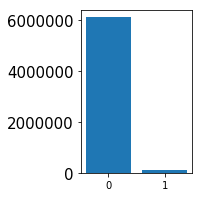

In [293]:
# number of units with and without cupon
unit_coupon=pd.DataFrame(trans_prod.groupby(['coupon'])['units'].sum()).sort_values(['units'], ascending=False).reset_index()
#unit_coupon=unit_coupon.rename(index=str,columns={'basket':'count_of_visit'})
plt.figure(figsize=(2,3))
plt.bar((unit_coupon.coupon), unit_coupon.units)

In [510]:
unit_coupon.units

0    6103126
1     105451
Name: units, dtype: int64

<BarContainer object of 2 artists>

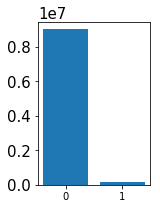

In [299]:
# sales with and without cupon
sales_coupon=pd.DataFrame(trans_prod.groupby(['coupon'])['dollar_sales'].sum()).sort_values(['dollar_sales'], ascending=False).reset_index()
plt.figure(figsize=(2,3))
plt.bar(sales_coupon.coupon, sales_coupon.dollar_sales)

In [511]:
sales_coupon.dollar_sales

0    8.996358e+06
1    1.345607e+05
Name: dollar_sales, dtype: float64

- without cupon sales are higher than with cupon sles

### For each commodity geography vs unit bar plot

In [301]:
trans_prod_zip = trans_prod.merge(stores, 'left', 'store')

In [302]:
trans_prod_zip.columns

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon',
       'product_description', 'commodity', 'brand', 'product_size',
       'unit_price', 'store_zip_code'],
      dtype='object')

In [303]:
trans_prod_zip=trans_prod_zip[['upc', 'geography', 'store',  'store_zip_code','household','unit_price', 'units','dollar_sales',  'time_of_transaction',
       'day','week',   'basket',  'coupon',
       'product_description', 'commodity', 'brand', 'product_size']]
trans_prod_zip.head()

,upc,geography,store,store_zip_code,household,unit_price,units,dollar_sales,time_of_transaction,day,week,basket,coupon,product_description,commodity,brand,product_size
0,7680850106,2,244,40222,125434,0.80,1,0.80,1100,1,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
1,3620000470,2,244,40222,125434,3.59,1,3.59,1100,1,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ
2,1800028064,2,244,40222,108320,2.25,1,2.25,1137,1,1,2,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,
3,9999985067,2,244,40222,162016,0.85,1,0.85,1148,1,1,3,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ
4,9999985131,2,244,40222,89437,2.19,1,2.19,1323,1,1,4,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ


<BarContainer object of 2 artists>

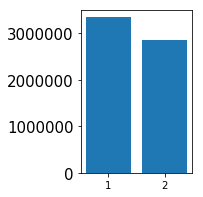

In [304]:
# number of units regarding region
unit_geography=pd.DataFrame(trans_prod_zip.groupby(['geography'])['units'].sum()).sort_values(['units'], ascending=False).reset_index()
#unit_coupon=unit_coupon.rename(index=str,columns={'basket':'count_of_visit'})
plt.figure(figsize=(2,3))
plt.bar(unit_geography.geography, unit_geography.units)

In [512]:
unit_geography.units

0    3344878
1    2863699
Name: units, dtype: int64

<BarContainer object of 2 artists>

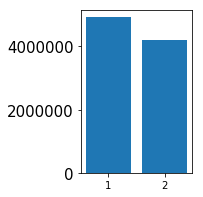

In [516]:
# sales regrding region
sales_geography=pd.DataFrame(trans_prod_zip.groupby(['geography'])['dollar_sales'].sum()).sort_values(['dollar_sales'], ascending=False).reset_index()
#unit_coupon=unit_coupon.rename(index=str,columns={'basket':'count_of_visit'})
plt.figure(figsize=(2,3))
plt.bar(sales_geography.geography, sales_geography.dollar_sales)

- geographic 1 sales are higher than geographic 2 

- since geoghraphy 2's sales lower than geoghraphy 1, I would like to check number of stores for each region to compare geoghraphical performance

In [521]:
causal.head(2)

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1


In [531]:
# number of stores geography 1 and 2
causal.groupby(['geography'])['store'].nunique()

geography
1    224
2    157
Name: store, dtype: int64

In [64]:
# more than one store in same zip code area
stors_at_zip.sort_values(by='store', ascending=False).head()

,store
store_zip_code,
37211,5
40502,4
30064,4
30062,3
42301,3


### d. What is the repeat rate for each commodity?

 $$rapeat_{rate}=\frac{number_{of} customer_{who}shopped_{more}than_{once}}{number_{of}customers}$$

###### Repeat rate calculation for each commodity
- pasta
- pasta sauce
- pancake mixes
- syrups

In [532]:
pasta=trans_prod[trans_prod.commodity=='pasta']
pasta_sauce=trans_prod[trans_prod.commodity=='pasta sauce']
pancake_mixes=trans_prod[trans_prod.commodity=='pancake mixes']
syrups=trans_prod[trans_prod.commodity=='syrups']

##### pasta repeat rate

In [533]:
pasta_hh_visits = pd.DataFrame(pasta.groupby(['household'])['basket'].nunique())
pasta_hh_visits=pasta_hh_visits.rename(index=str,columns={'basket':'count_of_visit'})
pasta_repeat_customer=pasta_hh_visits.sort_values(['count_of_visit'], ascending=False)
pasta_repeat_customer=pasta_repeat_customer.reset_index()
pasta_repeat_customer.head()

,household,count_of_visit
0,293395,161
1,323105,140
2,28955,133
3,299226,128
4,194354,123


In [534]:
pasta_customer_vis_freq=pd.DataFrame(pasta_repeat_customer.groupby(['count_of_visit'])['household'].count())
pasta_customer_vis_freq=pasta_customer_vis_freq.rename(index=str,columns={'household':'frequency'})
pasta_customer_vis_freq=pasta_customer_vis_freq.reset_index()
pasta_customer_vis_freq['count_of_visit'] = pasta_customer_vis_freq['count_of_visit'].astype('int')
pasta_customer_vis_freq.head()

,count_of_visit,frequency
0,1,145444
1,2,67112
2,3,42082
3,4,29524
4,5,22102


In [543]:
pasta_customer_vis_freq.to_csv('pasta_customer_vis_freq.csv', index=False)

<BarContainer object of 108 artists>

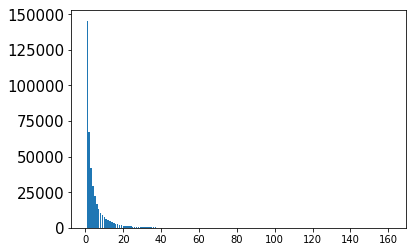

In [535]:
plt.bar(pasta_customer_vis_freq.count_of_visit, pasta_customer_vis_freq.frequency)

In [536]:
pasta_customer_vis_freq['total_visit'] = pasta_customer_vis_freq['count_of_visit'] * pasta_customer_vis_freq['frequency']

In [537]:
pasta_customer_vis_freq.head()

,count_of_visit,frequency,total_visit
0,1,145444,145444
1,2,67112,134224
2,3,42082,126246
3,4,29524,118096
4,5,22102,110510


In [538]:
## Number of repetitive customer
number_rep_cust_pasta = pasta_customer_vis_freq[pasta_customer_vis_freq['count_of_visit'] != 1]['total_visit'].sum()
number_rep_cust_pasta

1812717

In [539]:
## Total pasta visits 
total_pasta_visit = len(pasta['basket'].drop_duplicates())
total_pasta_visit

1958161

In [540]:
rep_cust_pasta = number_rep_cust_pasta/total_pasta_visit

In [548]:
print('Repetitive customer rate for pasta:{}%'.format(round(rep_cust_pasta*100,1)))

Repetitive customer rate for pasta:92.6%


#### pasta sauce

In [307]:
pasta_sauce_hh_visits = pd.DataFrame(pasta_sauce.groupby(['household'])['basket'].nunique())
pasta_sauce_hh_visits=pasta_sauce_hh_visits.rename(index=str,columns={'basket':'count_of_visit'})
pasta_sauce_repeat_customer=pasta_sauce_hh_visits.sort_values(['count_of_visit'], ascending=False)
pasta_sauce_repeat_customer=pasta_sauce_repeat_customer.reset_index()
pasta_sauce_repeat_customer.head()

,household,count_of_visit
0,106758,214
1,28955,139
2,133748,118
3,265319,96
4,166534,92


In [308]:
pasta_sauce_customer_vis_freq=pd.DataFrame(pasta_sauce_repeat_customer.groupby(['count_of_visit'])['household'].count())
pasta_sauce_customer_vis_freq=pasta_sauce_customer_vis_freq.rename(index=str,columns={'household':'frequency'})
pasta_sauce_customer_vis_freq=pasta_sauce_customer_vis_freq.reset_index()
pasta_sauce_customer_vis_freq['count_of_visit'] = pasta_sauce_customer_vis_freq['count_of_visit'].astype('int')
pasta_sauce_customer_vis_freq.head()

,count_of_visit,frequency
0,1,135910
1,2,61807
2,3,37700
3,4,25833
4,5,18827


<BarContainer object of 93 artists>

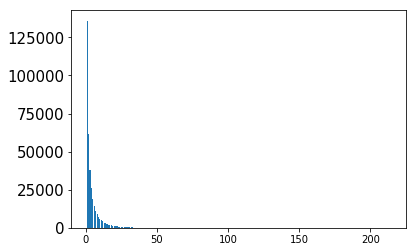

In [309]:
plt.bar(pasta_sauce_customer_vis_freq.count_of_visit, pasta_sauce_customer_vis_freq.frequency)

In [310]:
pasta_sauce_customer_vis_freq['total_visit'] = pasta_sauce_customer_vis_freq['count_of_visit'] * pasta_sauce_customer_vis_freq['frequency']

In [311]:
pasta_sauce_customer_vis_freq.head()

,count_of_visit,frequency,total_visit
0,1,135910,135910
1,2,61807,123614
2,3,37700,113100
3,4,25833,103332
4,5,18827,94135


In [327]:
## Number of repetitive customer
number_rep_cust_pasta_sauce = pasta_sauce_customer_vis_freq[pasta_sauce_customer_vis_freq['count_of_visit'] != 1]['total_visit'].sum()
number_rep_cust_pasta_sauce

1407553

In [328]:
## Total pasta visits 
total_pasta_sauce_visit = len(pasta_sauce['basket'].drop_duplicates())
total_pasta_sauce_visit

1543463

In [329]:
rep_cust_pasta_sauce = number_rep_cust_pasta_sauce/total_pasta_sauce_visit

In [547]:
print('Repetitive customer rate for pasta souce:{}%'.format(round(rep_cust_pasta_sauce*100,1)))

Repetitive customer rate for pasta souce:91.2%


### pancake mixes

In [317]:
pancake_mixes_hh_visits = pd.DataFrame(pancake_mixes.groupby(['household'])['basket'].nunique())
pancake_mixes_hh_visits=pancake_mixes_hh_visits.rename(index=str,columns={'basket':'count_of_visit'})
pancake_mixes_repeat_customer=pancake_mixes_hh_visits.sort_values(['count_of_visit'], ascending=False)
pancake_mixes_repeat_customer=pancake_mixes_repeat_customer.reset_index()
pancake_mixes_repeat_customer.head()

,household,count_of_visit
0,232513,144
1,340439,70
2,254942,69
3,59972,66
4,28725,62


In [318]:
pancake_mixes_customer_vis_freq=pd.DataFrame(pancake_mixes_repeat_customer.groupby(['count_of_visit'])['household'].count())
pancake_mixes_customer_vis_freq=pancake_mixes_customer_vis_freq.rename(index=str,columns={'household':'frequency'})
pancake_mixes_customer_vis_freq=pancake_mixes_customer_vis_freq.reset_index()
pancake_mixes_customer_vis_freq['count_of_visit'] = pancake_mixes_customer_vis_freq['count_of_visit'].astype('int')
pancake_mixes_customer_vis_freq.head()

,count_of_visit,frequency
0,1,80177
1,2,23778
2,3,10712
3,4,5605
4,5,3182


<BarContainer object of 59 artists>

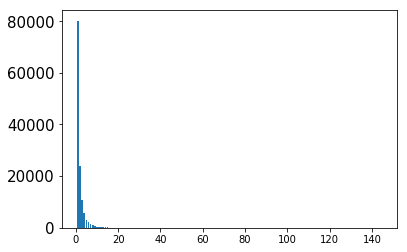

In [319]:
plt.bar(pancake_mixes_customer_vis_freq.count_of_visit,pancake_mixes_customer_vis_freq.frequency)

In [322]:
pancake_mixes_customer_vis_freq['total_visit'] = pancake_mixes_customer_vis_freq['count_of_visit'] * pancake_mixes_customer_vis_freq['frequency']

In [323]:
pancake_mixes_customer_vis_freq.head()

,count_of_visit,frequency,total_visit
0,1,80177,80177
1,2,23778,47556
2,3,10712,32136
3,4,5605,22420
4,5,3182,15910


In [324]:
## Number of repetitive customer
number_rep_cust_pancake_mixes = pancake_mixes_customer_vis_freq[pancake_mixes_customer_vis_freq['count_of_visit'] != 1]['total_visit'].sum()
number_rep_cust_pancake_mixes

183619

In [331]:
## Total pancake_mixes visits 
total_pancake_mixes_visit = len(pancake_mixes['basket'].drop_duplicates())
total_pancake_mixes_visit

263796

In [332]:
rep_cust_pancake_mixes = number_rep_cust_pancake_mixes/total_pancake_mixes_visit

In [545]:
print('Repetitive customer rate for pancake mixes:{}%'.format(round(rep_cust_pancake_mixes*100,1)))

Repetitive customer rate for pancake mixes:69.6%


#### syrups

In [335]:
syrups_hh_visits = pd.DataFrame(syrups.groupby(['household'])['basket'].nunique())
syrups_hh_visits=syrups_hh_visits.rename(index=str,columns={'basket':'count_of_visit'})
syrups_repeat_customer=syrups_hh_visits.sort_values(['count_of_visit'], ascending=False)
syrups_repeat_customer=syrups_repeat_customer.reset_index()
syrups_repeat_customer.head()

,household,count_of_visit
0,98794,137
1,340836,110
2,340632,107
3,193970,106
4,285611,96


In [336]:
syrups_customer_vis_freq=pd.DataFrame(syrups_repeat_customer.groupby(['count_of_visit'])['household'].count())
syrups_customer_vis_freq=syrups_customer_vis_freq.rename(index=str,columns={'household':'frequency'})
syrups_customer_vis_freq=syrups_customer_vis_freq.reset_index()
syrups_customer_vis_freq['count_of_visit'] = syrups_customer_vis_freq['count_of_visit'].astype('int')
syrups_customer_vis_freq.head()

,count_of_visit,frequency
0,1,130809
1,2,50107
2,3,25862
3,4,15313
4,5,9688


<BarContainer object of 75 artists>

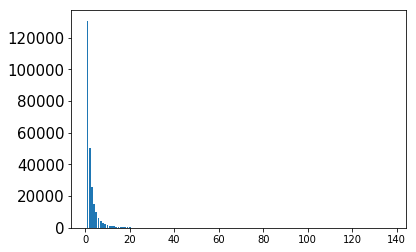

In [337]:
plt.bar(syrups_customer_vis_freq.count_of_visit, syrups_customer_vis_freq.frequency)

In [338]:
syrups_customer_vis_freq['total_visit'] = syrups_customer_vis_freq['count_of_visit'] * syrups_customer_vis_freq['frequency']

In [339]:
syrups_customer_vis_freq.head()

,count_of_visit,frequency,total_visit
0,1,130809,130809
1,2,50107,100214
2,3,25862,77586
3,4,15313,61252
4,5,9688,48440


In [340]:
## Number of repetitive customer
number_rep_cust_syrups = syrups_customer_vis_freq[syrups_customer_vis_freq['count_of_visit'] != 1]['total_visit'].sum()
number_rep_cust_syrups

527786

In [342]:
## Total pasta visits 
total_syrups_visit = len(syrups['basket'].drop_duplicates())
total_syrups_visit

658595

In [345]:
rep_cust_syrups = number_rep_cust_syrups/total_syrups_visit

In [546]:
print('Repetitive customer rate for syrups souce:{}%'.format(round(rep_cust_syrups*100,1)))

Repetitive customer rate for syrups souce:80.1%


### e. How is the health of the category?

#### 2 years KPI 

In [551]:
trans_prod.dollar_sales.sum()

9130919.079999989

In [ ]:
# Year1
trans_prod.year1=trans_prod[trans_prod.week<=52]

In [ ]:
# Year2
trans_prod.year2=trans_prod[trans_prod.week>52]

In [362]:
# totalsales_year 1 and 2
sales_year1=trans_prod.year1.dollar_sales.sum()
sales_year2=trans_prod.year2.dollar_sales.sum()
# unit_year1
unit_year1=trans_prod.year1.units.sum()
unit_year2=trans_prod.year2.units.sum()
# unit price year1 and 2: If there are any outlier we should apply median() function instead of mean()
unit_price_year1=trans_prod.year1.unit_price.median()
unit_price_year2=trans_prod.year2.unit_price.median()
# We also need to check basket size 
basket_size_sales_year1=trans_prod.year1.groupby(['basket'])['dollar_sales'].sum().mean()
basket_size_sales_year2=trans_prod.year2.groupby(['basket'])['dollar_sales'].sum().mean()
# We also need to check basket size 
basket_size_unit_year1=trans_prod.year1.groupby(['basket'])['units'].sum().mean()
basket_size_unit_year2=trans_prod.year2.groupby(['basket'])['units'].sum().mean()

In [554]:
#yearly dollar sale transaction average for stores
trans_prod.year1.dollar_sales.sum()/(224+157)

11676.64614173228

- yearly dollar sale transaction average for each store is very low. so There is an **anomaly** in the sale price.

In [549]:
# two years KPI
KPI_all = [['year_1',sales_year1, unit_year1, unit_price_year1, basket_size_sales_year1, basket_size_unit_year1],
                    ['year_2',sales_year2, unit_year2, unit_price_year2,basket_size_sales_year2,  basket_size_unit_year2]]
KPI_all_products = pd.DataFrame(KPI_all,columns=['year', 'sales','units', 'unit_price', 'basket_size_sale', 'basket_size_units'])
KPI_all_products

,year,sales,units,unit_price,basket_size_sale,basket_size_units
0,year_1,859372.94,352650,2.39,2.674017,1.097303
1,year_2,881963.95,372047,2.29,2.615427,1.103290


In [583]:
859372.94/352650

2.4369004395292784

In [571]:
# number of transection average for stores in 2 years
trans_prod.units.sum()/stores.store.drop_duplicates().count()

16042.834625322997

In [550]:
KPI_all_products.to_csv('KPI_all_products.csv', index=False)

<BarContainer object of 2 artists>

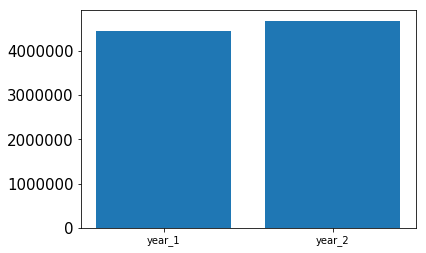

In [387]:
plt.bar(KPI_all_products.year, KPI_all_products.sales)

<BarContainer object of 2 artists>

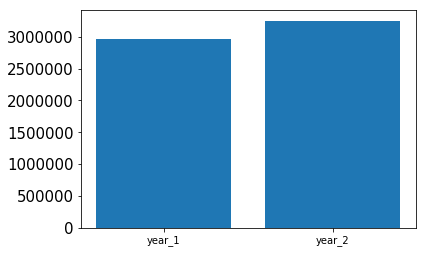

In [388]:
plt.bar(KPI_all_products.year, KPI_all_products.units)

<BarContainer object of 2 artists>

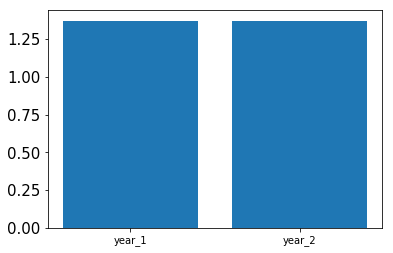

In [389]:
plt.bar(KPI_all_products.year, KPI_all_products.unit_price)

<BarContainer object of 2 artists>

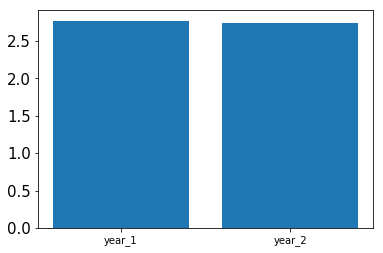

In [392]:
plt.bar(KPI_all_products.year, KPI_all_products.basket_size_sale)

<BarContainer object of 2 artists>

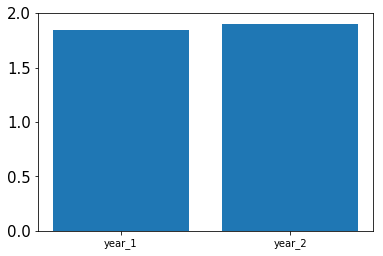

In [393]:
plt.bar(KPI_all_products.year, KPI_all_products.basket_size_units)

In [575]:
# KPI for pasta 
pasta.year1=pasta[pasta.week<=52]
pasta.year2=pasta[pasta.week>52]

sales_year1=pasta.year1.dollar_sales.sum()
sales_year2=pasta.year2.dollar_sales.sum()
# unit_year1
unit_year1=pasta.year1.units.sum()
unit_year2=pasta.year2.units.sum()
# unit price year1 and 2: If there are any outlier we should apply median() function instead of mean()
unit_price_year1=pasta.year1.unit_price.median()
unit_price_year2=pasta.year2.unit_price.median()
# We also need to check basket size 
basket_size_sales_year1=pasta.year1.groupby(['basket'])['dollar_sales'].sum().mean()
basket_size_sales_year2=pasta.year2.groupby(['basket'])['dollar_sales'].sum().mean()
# We also need to check basket size 
basket_size_unit_year1=pasta.year1.groupby(['basket'])['units'].sum().mean()
basket_size_unit_year2=pasta.year2.groupby(['basket'])['units'].sum().mean()
# two years KPI
KPI_pasta = [['year_1',sales_year1, unit_year1, unit_price_year1, basket_size_sales_year1, basket_size_unit_year1],
                    ['year_2',sales_year2, unit_year2, unit_price_year2,basket_size_sales_year2,  basket_size_unit_year2]]
KPI_pasta_products = pd.DataFrame(KPI_pasta,columns=['year', 'sales','units', 'unit_price', 'basket_size_sale', 'basket_size_units'])
KPI_pasta_products

C:\Users\AKAYA\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\AKAYA\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,year,sales,units,unit_price,basket_size_sale,basket_size_units
0,year_1,1381562.86,1368893,0.99,1.456460,1.443103
1,year_2,1470980.85,1504167,0.99,1.457015,1.489886


In [574]:
KPI_pasta_products.to_csv('KPI_pasta_products.csv', index=False)

In [577]:
# KPI for pasta_sauce 
pasta_sauce.year1=pasta_sauce[pasta_sauce.week<=52]
pasta_sauce.year2=pasta_sauce[pasta_sauce.week>52]

C:\Users\AKAYA\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\AKAYA\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [578]:
sales_year1=pasta_sauce.year1.dollar_sales.sum()
sales_year2=pasta_sauce.year2.dollar_sales.sum()
# unit_year1
unit_year1=pasta_sauce.year1.units.sum()
unit_year2=pasta_sauce.year2.units.sum()

In [579]:
# unit price year1 and 2: If there are any outlier we should apply median() function instead of mean()
unit_price_year1=pasta_sauce.year1.unit_price.median()
unit_price_year2=pasta_sauce.year2.unit_price.median()
# We also need to check basket size 
basket_size_sales_year1=pasta_sauce.year1.groupby(['basket'])['dollar_sales'].sum().mean()
basket_size_sales_year2=pasta_sauce.year2.groupby(['basket'])['dollar_sales'].sum().mean()
# We also need to check basket size 
basket_size_unit_year1=pasta_sauce.year1.groupby(['basket'])['units'].sum().mean()
basket_size_unit_year2=pasta_sauce.year2.groupby(['basket'])['units'].sum().mean()
# two years KPI
KPI_pasta_sauce = [['year_1',sales_year1, unit_year1, unit_price_year1, basket_size_sales_year1, basket_size_unit_year1],
                    ['year_2',sales_year2, unit_year2, unit_price_year2,basket_size_sales_year2,  basket_size_unit_year2]]
KPI_pasta_sauce_products = pd.DataFrame(KPI_pasta_sauce,columns=['year', 'sales','units', 'unit_price', 'basket_size_sale', 'basket_size_units'])
KPI_pasta_sauce_products

,year,sales,units,unit_price,basket_size_sale,basket_size_units
0,year_1,1962860.95,1094443,1.61,2.644321,1.474408
1,year_2,2062337.69,1215925,1.58,2.574157,1.517687


In [580]:
# KPI for pancake_mixes 
pancake_mixes.year1=pancake_mixes[pancake_mixes.week<=52]
pancake_mixes.year2=pancake_mixes[pancake_mixes.week>52]

sales_year1=pancake_mixes.year1.dollar_sales.sum()
sales_year2=pancake_mixes.year2.dollar_sales.sum()
# unit_year1
unit_year1=pancake_mixes.year1.units.sum()
unit_year2=pancake_mixes.year2.units.sum()
# unit price year1 and 2: If there are any outlier we should apply median() function instead of mean()
unit_price_year1=pancake_mixes.year1.unit_price.median()
unit_price_year2=pancake_mixes.year2.unit_price.median()
# We also need to check basket size 
basket_size_sales_year1=pancake_mixes.year1.groupby(['basket'])['dollar_sales'].sum().mean()
basket_size_sales_year2=pancake_mixes.year2.groupby(['basket'])['dollar_sales'].sum().mean()
# We also need to check basket size 
basket_size_unit_year1=pancake_mixes.year1.groupby(['basket'])['units'].sum().mean()
basket_size_unit_year2=pancake_mixes.year2.groupby(['basket'])['units'].sum().mean()
# two years KPI
KPI_pancake_mixes = [['year_1',sales_year1, unit_year1, unit_price_year1, basket_size_sales_year1, basket_size_unit_year1],
                    ['year_2',sales_year2, unit_year2, unit_price_year2,basket_size_sales_year2,  basket_size_unit_year2]]
KPI_pancake_mixes_products = pd.DataFrame(KPI_pancake_mixes,columns=['year', 'sales','units', 'unit_price', 'basket_size_sale', 'basket_size_units'])
KPI_pancake_mixes_products

C:\Users\AKAYA\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\AKAYA\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,year,sales,units,unit_price,basket_size_sale,basket_size_units
0,year_1,245005.43,142693,1.99,1.941945,1.131003
1,year_2,266834.41,157759,1.99,1.938767,1.146246


In [581]:
# KPI for syrups 
syrups.year1=syrups[syrups.week<=52]
syrups.year2=syrups[syrups.week>52]

sales_year1=syrups.year1.dollar_sales.sum()
sales_year2=syrups.year2.dollar_sales.sum()
# unit_year1
unit_year1=syrups.year1.units.sum()
unit_year2=syrups.year2.units.sum()
# unit price year1 and 2: If there are any outlier we should apply median() function instead of mean()
unit_price_year1=syrups.year1.unit_price.median()
unit_price_year2=syrups.year2.unit_price.median()
# We also need to check basket size 
basket_size_sales_year1=syrups.year1.groupby(['basket'])['dollar_sales'].sum().mean()
basket_size_sales_year2=syrups.year2.groupby(['basket'])['dollar_sales'].sum().mean()
# We also need to check basket size 
basket_size_unit_year1=syrups.year1.groupby(['basket'])['units'].sum().mean()
basket_size_unit_year2=syrups.year2.groupby(['basket'])['units'].sum().mean()
# two years KPI
KPI_syrups = [['year_1',sales_year1, unit_year1, unit_price_year1, basket_size_sales_year1, basket_size_unit_year1],
                    ['year_2',sales_year2, unit_year2, unit_price_year2,basket_size_sales_year2,  basket_size_unit_year2]]
KPI_syrups_products = pd.DataFrame(KPI_syrups,columns=['year', 'sales','units', 'unit_price', 'basket_size_sale', 'basket_size_units'])
KPI_syrups_products

C:\Users\AKAYA\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\AKAYA\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,year,sales,units,unit_price,basket_size_sale,basket_size_units
0,year_1,859372.94,352650,2.39,2.674017,1.097303
1,year_2,881963.95,372047,2.29,2.615427,1.103290


In [403]:
trans_prod.commodity.drop_duplicates()

0            pasta
1      pasta sauce
2    pancake mixes
6           syrups
Name: commodity, dtype: object

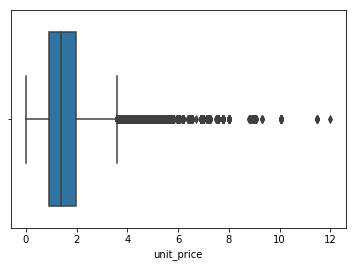

In [353]:
import seaborn as sns
sns.boxplot(x=trans_prod.unit_price)

In [430]:
# weekly sales graph for each commidity
pasta_weekly_sales=pd.DataFrame(pasta.groupby(['week'])['dollar_sales'].sum()).reset_index()
pasta_sauce_weekly_sales=pd.DataFrame(pasta_sauce.groupby(['week'])['dollar_sales'].sum()).reset_index()
pancake_mixes_weekly_sales=pd.DataFrame(pancake_mixes.groupby(['week'])['dollar_sales'].sum()).reset_index()
syrups_weekly_sales=pd.DataFrame(syrups.groupby(['week'])['dollar_sales'].sum()).reset_index()

In [427]:
import plotly.plotly as py
import plotly.graph_objs as go

In [437]:
trace_1 = go.Scatter(x=pasta_weekly_sales.week,
                     y=pasta_weekly_sales.dollar_sales,
                name = "pasta",
                line = dict(color = 'blue'),
                opacity = 0.8)
trace_2 = go.Scatter(
                x=pasta_sauce_weekly_sales.week,
                y=pasta_sauce_weekly_sales.dollar_sales,
                name = "pasta sauce",
                line = dict(color = 'green'),
                opacity = 0.8)
trace_3 = go.Scatter(
                x=pancake_mixes_weekly_sales.week,
                y=pancake_mixes_weekly_sales.dollar_sales,
                name = "pancake mixes",
                line = dict(color = 'black'),
                opacity = 0.8)
trace_4 = go.Scatter(
                x=syrups_weekly_sales.week,
                y=syrups_weekly_sales.dollar_sales,
                name = "syrups weekly",
                line = dict(color = 'red'),
                opacity = 0.8)
data = [trace_1,trace_2, trace_3,trace_4]

layout = dict(
    title = "weekly total sales for each commodity",
    xaxis = dict(
        range = ['1','104'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

C:\Users\AKAYA\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



- at week 19th while transection for pasta souce was decreasing syrupe was increasing.

In [601]:
#19th week and 71 th week seasonal effect
week_19th=trans_prod[trans_prod.week==19]
pd.DataFrame(week_19th[week_19th.commodity=='syrups'].groupby(['brand'])['dollar_sales'].sum())\
                    .sort_values(['dollar_sales'], ascending=False)\
                    .reset_index().head(5)

,brand,dollar_sales
0,Karo,6211.31
1,Private Label,5424.39
2,Aunt Jemima,3980.98
3,Private Label Premium,1814.19
4,Mrs Butterworth,1626.86


In [602]:
# weekly sales graph for each commidity
pasta_weekly_units=pd.DataFrame(pasta.groupby(['week'])['units'].sum()).reset_index()
pasta_sauce_weekly_units=pd.DataFrame(pasta_sauce.groupby(['week'])['units'].sum()).reset_index()
pancake_mixes_weekly_units=pd.DataFrame(pancake_mixes.groupby(['week'])['units'].sum()).reset_index()
syrups_weekly_units=pd.DataFrame(syrups.groupby(['week'])['units'].sum()).reset_index()

In [604]:
trace_1 = go.Scatter(x=pasta_weekly_units.week,
                     y=pasta_weekly_units.units,
                name = "pasta",
                line = dict(color = 'blue'),
                opacity = 0.8)
trace_2 = go.Scatter(
                x=pasta_sauce_weekly_units.week,
                y=pasta_sauce_weekly_units.units,
                name = "pasta sauce",
                line = dict(color = 'green'),
                opacity = 0.8)
trace_3 = go.Scatter(
                x=pancake_mixes_weekly_units.week,
                y=pancake_mixes_weekly_units.units,
                name = "pancake mixes",
                line = dict(color = 'black'),
                opacity = 0.8)
trace_4 = go.Scatter(
                x=syrups_weekly_units.week,
                y=syrups_weekly_units.units,
                name = "syrups weekly",
                line = dict(color = 'red'),
                opacity = 0.8)
data = [trace_1,trace_2, trace_3,trace_4]

layout = dict(
    title = "weekly total units for each commodity",
    xaxis = dict(
        range = ['1','104'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

C:\Users\AKAYA\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



- based on counting units at the 79th week  pasta souce number of unit transection are increased sharply

In [613]:
# very sharp peak apear at the 27 th and 79 th weeks
week_27th=trans_prod[trans_prod.week==27]
pd.DataFrame(week_27th[week_27th.commodity=='pasta sauce'].groupby(['brand'])['units'].sum())\
                    .sort_values(['units'], ascending=False)\
                    .reset_index().head(5)

,brand,units
0,Ragu,36333
1,Prego,2788
2,Private Label,2357
3,Hunt's,1527
4,Classico,1343


In [616]:
# very sharp peak apear at the 27 th and 79 th weeks
week_79th=trans_prod[trans_prod.week==79]
pd.DataFrame(week_79th[week_79th.commodity=='pasta sauce'].groupby(['brand'])['units'].sum())\
                    .sort_values(['units'], ascending=False)\
                    .reset_index().head(5)

,brand,units
0,Ragu,49312
1,Prego,3581
2,Private Label,2196
3,Hunt's,1683
4,Classico,1312
